# Notebook clasificación
### Dataset utilizado: "Mushroom Dataset (Binary Classification)"
Espín Acevedo Luis Antonio

El objetivo de esta notebook es un clasificador que determine si un hongo es venenoso o no con las siguientes variables:

- Features: 
    - cap-diameter: Diámetro de la tapa
    - cap-shape: Forma de gorra
    - gill-attatchment: Accesorio branquial
    - gill-color: Color de branquias
    - stem-heigth: Altura del tallo
    - stem-width: Ancho del tallo
    - stem-color: Color del tallo
    - season: Estación

- Feature value
    - class: Clase objetivo: ¿es comestible o no?

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
mush = pd.read_csv("mushroom_cleaned.csv")
mush

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


# Preprocesamiento de los datos

## Ver datos faltantes

In [3]:
mush_prep = mush.copy()
mush_prep.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

## Tipo de dato en cada columna

In [4]:
mush_prep.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

## Normalizamos las siguientes características:
- cap-diameter
- stem-heigth
- stem-width
##### La decisión de normalizar únicamente estas características es debido a que son las únicas variables numéricas que son cuantitativas, y no cualitativas a o categóricas.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(mush[['cap-diameter','stem-height','stem-width', 'season']])
mush_prep.loc[:,['cap-diameter','stem-height','stem-width', 'season']] = datos_normalizados

C:\Users\luise\AppData\Local\Temp\ipykernel_16380\1503165125.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.72554204 0.77260709 0.72501322 ... 0.0433633  0.04177684 0.03807509]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mush_prep.loc[:,['cap-diameter','stem-height','stem-width', 'season']] = datos_normalizados
C:\Users\luise\AppData\Local\Temp\ipykernel_16380\1503165125.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.43289437 0.43625665 0.43877837 ... 0.16363127 0.13757355 0.13785374]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mush_prep.loc[:,['cap-diameter','stem-height','stem-width', 'season']] = datos_normalizados


Obtenemos los nombres de las columnas. Eliminamos la columna "class".

In [6]:
feature_names = mush_prep.copy().drop("class", axis=1).columns.to_list()
feature_names

['cap-diameter',
 'cap-shape',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season']

Separamos las características.

In [7]:
features = mush_prep.copy().loc[:,feature_names].values
features

array([[ 0.72554204,  2.        ,  2.        , ...,  0.43289437,
        11.        ,  1.        ],
       [ 0.77260709,  2.        ,  2.        , ...,  0.43625665,
        11.        ,  1.        ],
       [ 0.72501322,  2.        ,  2.        , ...,  0.43877837,
        11.        ,  1.        ],
       ...,
       [ 0.0433633 ,  5.        ,  3.        , ...,  0.16363127,
        12.        ,  0.48459557],
       [ 0.04177684,  2.        ,  3.        , ...,  0.13757355,
        12.        ,  0.48459557],
       [ 0.03807509,  5.        ,  3.        , ...,  0.13785374,
        12.        ,  0.48459557]])

Separamos la clase o variable objetivo.

In [8]:
y = mush_prep["class"].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Modelos usados para la clasificación
- SVM (Máquina de soporte vectorial)
- Decision tree
- Random forest

## SVM

#### Separación de conjuintos de entrenamiento y prueba / creación de la svm

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, y, train_size=0.75)

In [10]:
classifier = SVC(kernel= 'rbf', random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.713344519567685

#### Matriz de confusión para SVM

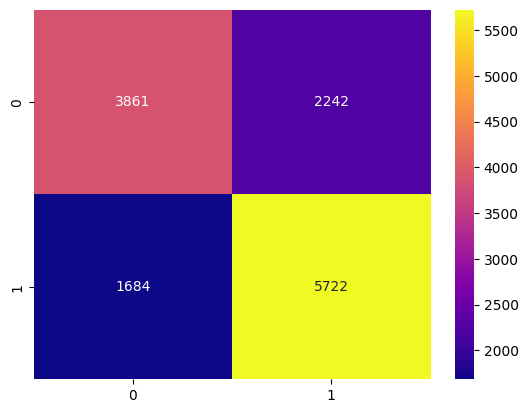

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_svm = classifier.predict(X_test)

CM2 = confusion_matrix(y_test, y_pred_svm)

cm_svm = sns.heatmap(CM2,cmap='plasma',annot=True, fmt='g')
plt.show()

#### Métricas de rendimiento para SVM

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred_svm),5)}")
print(f"Recall: {round(recall_score(y_test,y_pred_svm),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred_svm),5)}")
print(f"F1 Score: {round(f1_score(y_test,y_pred_svm),5)}")

Accuracy: 0.70938
Recall: 0.77262
Precision: 0.71848
F1 Score: 0.74457


## Decision tree

#### Creación del Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier() 
d_tree_train = d_tree.fit(X_train,y_train)
y_pred_d_tree = d_tree_train.predict(X_test)

#### Matriz de confusión

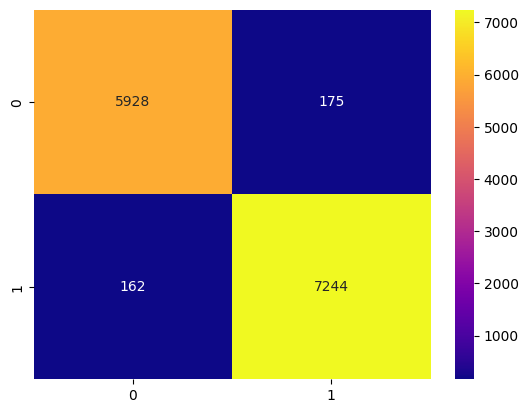

In [14]:
cm_d_tree = confusion_matrix(y_test,y_pred_d_tree)
cm_d_tree = sns.heatmap(cm_d_tree,cmap='plasma',annot=True, fmt='g')
plt.show()

In [15]:
print(f"Accuracy: {round(accuracy_score(y_test,y_pred_d_tree),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred_d_tree),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred_d_tree),3)}")
print(f"F1 Score: {round(f1_score(y_test,y_pred_d_tree),3)}")

Accuracy: 0.975
Recall: 0.97813
Precision: 0.976
F1 Score: 0.977


### Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() 

clf = clf.fit(X_train,y_train)  
y_pred_rf = clf.predict(X_test)

### Matriz de confusión

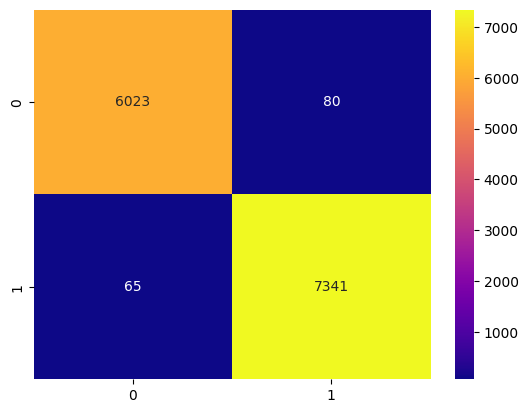

In [17]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf = sns.heatmap(cm_rf,cmap='plasma',annot=True, fmt='g')
plt.show()

In [18]:
print(f"Accuracy: {round(accuracy_score(y_test,y_pred_rf),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred_rf),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred_rf),3)}")
print(f"F1 Score: {round(f1_score(y_test,y_pred_rf),3)}")

Accuracy: 0.989
Recall: 0.99122
Precision: 0.989
F1 Score: 0.99


# Conclusión
Como podemos observar, las técnicas usadas de clasificación son, en su mayoría, eficientes y acertadas para clasificar correctamente la clase de cada hongo en este conjunto de datos, siendo la mejor el Random Forest, con métricas de rendimiento más cercanas a 1.